<a href="https://colab.research.google.com/github/ronaldolg26/estudo_para_datascience/blob/main/Analise_Airbnb_Lisboa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Airbnb em Lisboa

<img src="https://viagemeturismo.abril.com.br/wp-content/uploads/2017/01/belem-tower-2809818_1920.jpg?quality=70&strip=info&resize=680,453" >

O Airbnb é considerado a maior rede hoteleira do mundo sem ao menos ter um único hotel fisicamente.

O diferencial da empresa está e simplificar a hospedagem de pessoas querem viajar com outras que tem quartos, casas, apartamentos para alugar.

No final de 2018, a Startup fundada 10 anos atrás, já havia hospedado mais de 300 milhões de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal Inside Airbnb, é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de Data Science.


##Lisboa
Um dos dataset disponíveis para analise, está o da capital de Portugal, Lisboa. A sua gastronomia e sua arquitetura secular atraem cerca de 20 milhões de passageiros anualmente. Logo, esse Notebook se propõe em fazer uma análise dos dados da capital portuguesa em busca de insights a partir de dados brutos de 2021 disponibilizados pelo Airbnb.

##Obtenção dos Dados
Os dados usados foram obtidos a partir do site Inside Airbnb.

Por esta ser uma análise exploratória inicial, os dados utilizados nesse projeto, são uma versão resumida do dataset.

```listings.csv``` - Summary information and metrics for listings in Lisboa (good for visualisations).


In [ ]:
# importar os pacotes necessarios
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv('http://data.insideairbnb.com/portugal/lisbon/lisbon/2021-12-08/visualisations/listings.csv')

##Análise dos Dados
Nesta etapa o objetivo é garantir um entendimento de como os dados estão estruturados, de forma que o leitor tenha consciência do que será analisado. Sendo assim, será apresentado um dicionário a respeito de cada uma das variáveis.

##Dicionário das variáveis



* ``id`` - número de identificação do imóvel
* ``name`` - Título do anúncio da propriedade
* ``host_id`` - número de identificação do proprietário
* ``host_name`` - nome do anfitrião
* ``neighbourhood_group`` - coluna sem valores válidos
* ``neighbourhood`` - nome do bairro
* ``latitude`` - coordenada de latitude da propriedade
* ``longitude`` - coordenada de longitude da propriedade
* ``room_type`` - tipo de acomodação oferecida
* ``price`` - valor do aluguel
* ``minimum_nights`` - menor quantidade de noites para alugar
* ``number_of_reviews`` - número de reviews
* ``last_review`` - data do último review
* ``reviews_per_month`` - quantidade de reviews em um mês
* ``calculated_host_listings_count`` - quantidade de imóveis do mesmo anfitrião
* ``availability_365`` - número de dias de disponibilidade dentro de 365 dias


Antes de partirmos para as análises, vamos conhecer um pouco do nosso dataset, dando uma olhada nas 5 primeiras entradas.

In [ ]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,6499,Belém 1 Bedroom Historical Apartment,14455,Bruno,Lisboa,Belm,38.69750,-9.19768,Entire home/apt,40,3,32,2021-11-01,0.36,1,315,6,NaN
1,25659,Heart of Alfama Lisbon Center - Cœur de l'Alfama,107347,Ellie,Lisboa,Santa Maria Maior,38.71241,-9.12706,Entire home/apt,50,2,127,2021-11-27,1.37,1,325,14,56539/AL.
2,29248,Apartamento Alfama com vista para o rio!,125768,Bárbara,Lisboa,Santa Maria Maior,38.71082,-9.12719,Entire home/apt,60,5,337,2021-12-03,2.53,1,190,13,23535/AL
3,29396,Alfama Hill - Boutique apartment,126415,Mónica,Lisboa,Santa Maria Maior,38.71156,-9.12987,Entire home/apt,60,2,299,2021-12-03,2.57,1,302,40,28737/AL
4,29720,TheHOUSE - Your luxury home,128075,Francisco,Lisboa,Estrela,38.71108,-9.15979,Entire home/apt,957,2,64,2021-11-14,0.48,2,248,9,55695/AL


##Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?

Com algumas linhas de código, é possível notar a presença de 18 variáveis e 18527 entradas, sendo algumas delas dos tipos, inteiro, float e objeto.

In [ ]:
# identificar o volume de dados do DataFrame
print('Entradas:\t {}'.format(df.shape[0]))
print('Variáveis:\t {}'.format(df.shape[1]))

display(df.dtypes)

Entradas:	 18527
Variáveis:	 18


id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

Qual a porcentagem de valores ausentes no dataset?
Quando buscamos um dataset queremos um com qualidade, é possível mensurar isso de acordo com a quantidade de valores ausentes. É necessário entender se os valores nulos são significativos comparados ao total de entradas.

* Na coluna ``reviews_per_month`` e ``last_review`` são nulos 13,52 % dos dados
* 9% dos valores da variável ``license`` são nulos.
* Apenas 0,12% da variável ``host_name`` é nulo, seguido de 0,04 % da variável ``name``

In [ ]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
((df.isnull().sum() / df.shape[0])*100).sort_values(ascending = False) 

reviews_per_month                 13.526205
last_review                       13.526205
license                            9.710153
host_name                          0.124143
name                               0.043180
minimum_nights                     0.000000
number_of_reviews_ltm              0.000000
availability_365                   0.000000
calculated_host_listings_count     0.000000
number_of_reviews                  0.000000
id                                 0.000000
room_type                          0.000000
longitude                          0.000000
latitude                           0.000000
neighbourhood                      0.000000
neighbourhood_group                0.000000
host_id                            0.000000
price                              0.000000
dtype: float64

In [ ]:
# excluindo valores ausentes
df.dropna(axis=0, inplace=True)

# verificando o resultado
(df.isnull().sum()).sort_values(ascending=False)

id                                0
name                              0
number_of_reviews_ltm             0
availability_365                  0
calculated_host_listings_count    0
reviews_per_month                 0
last_review                       0
number_of_reviews                 0
minimum_nights                    0
price                             0
room_type                         0
longitude                         0
latitude                          0
neighbourhood                     0
neighbourhood_group               0
host_name                         0
host_id                           0
license                           0
dtype: int64

##Qual o tipo de distribuição das variáveis?
Para termos uma melhor visualização a respeito da distribuição das variáveis, irei plotar um histograma.

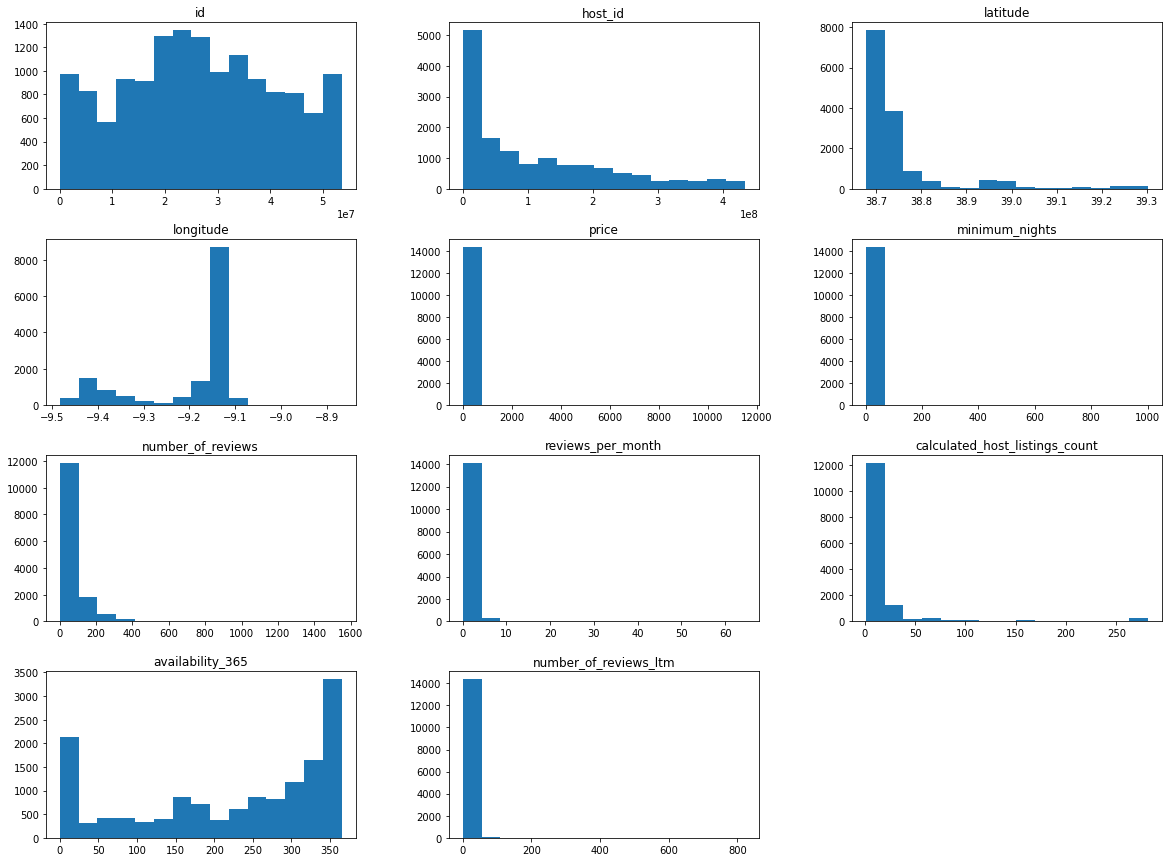

In [ ]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(20,15), grid=False);

##Há Outliers presentes?
Se prestarmos atenção na forma em como o histograma está distribuindo os dados, podemos encontrar indicativos da presença de outliers. É possível pegarmos como exemplo as variáveis ``price``, ``minimum_nights`` e ``calculated_host_listings_count``.

Os valores não seguem uma distribuição, e distorcem a representação gráfica. Para confirmar, existem duas maneiras rápidas que auxiliam a detecção de outliers. São elas:

In [ ]:
# ver o resumo estatístico das variáveis numéricas
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,14454.000000,14454.000000,14454.000000,14454.000000,14454.000000,14454.000000
mean,91.848554,3.621143,56.215235,1.261445,15.662031,221.500069
std,172.706430,15.933785,77.740398,1.375710,40.719962,127.307904
min,8.000000,1.000000,1.000000,0.010000,1.000000,0.000000
25%,50.000000,2.000000,6.000000,0.320000,1.000000,123.000000
50%,69.000000,2.000000,24.000000,0.880000,4.000000,261.000000
75%,100.000000,3.000000,76.000000,1.837500,12.000000,338.000000
max,11499.000000,1000.000000,1550.000000,64.440000,281.000000,365.000000


Olhando o resumo estatístico acima, podemos confirmar algumas hipóteses como:

* A variável price possui 75% do valor abaixo de 100,00, porém seu valor máximo é 11499,00.
* O valor máximo para a variável (minimum_nights) está acima de 365 dias no ano.

###Definindo limites para 'minimum_nights'

In [ ]:
q1_minimum_nights = df.minimum_nights.quantile(.25)
q3_minimum_nights = df.minimum_nights.quantile(.75)
IQR_minimum_nights = q3_minimum_nights - q1_minimum_nights
print('IQR da variável minimum_nights: ', IQR_minimum_nights)

# definindo os limites
sup_minimum_nights = q3_minimum_nights + 1.5 * IQR_minimum_nights
inf_minimum_nights = q1_minimum_nights - 1.5 * IQR_minimum_nights

print('Limite superior de minimum_nigths: ', sup_minimum_nights)
print('Limite inferios de minimum_nigths: ', inf_minimum_nights)

IQR da variável minimum_nights:  1.0
Limite superior de minimum_nigths:  4.5
Limite inferios de minimum_nigths:  0.5


###Boxplot para minimum_nights

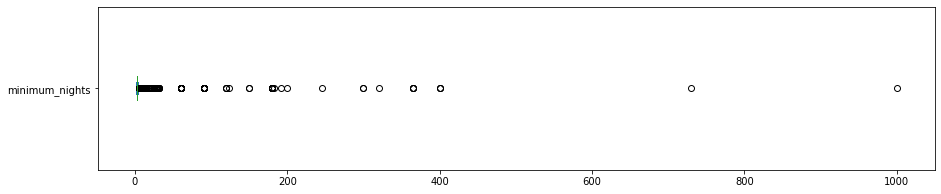

minimum_nights: valores acima de 4.5:
1406 entradas.
9.7274%


In [ ]:
# minimum_nights
df.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# ver quantidade de valores acima de 6 dias para minimum_nights
print('minimum_nights: valores acima de 4.5:')
print('{} entradas.'.format(len(df[df.minimum_nights > 4.5])))
print('{:.4f}%'.format((len(df[df.minimum_nights > 4.5]) / df.shape[0])*100))

Com isso podemos extrair algumas informações:

* Cerca de 1406 acomodações tem um mínimo acima de 4.5 noites
* Essas acomodações representam apenas 9.72% do dataset

## Definindo limites para 'Price'

In [ ]:
# identificando os outliers para a variável price
q1_price = df.price.quantile(.25)
q3_price = df.price.quantile(.75)
IQR_price = q3_price - q1_price
print('IQR da variável price: ', IQR_price)

# definindo os limites 
sup_price = q3_price + 1.5 * IQR_price
inf_price = q1_price - 1.5 * IQR_price

print('Limite superior de price: ', sup_price)
print('Limite inferior de price: ', inf_price)

IQR da variável price:  50.0
Limite superior de price:  175.0
Limite inferior de price:  -25.0


Perceba que os valores mínimos não condizem com a realidade pois há preços negativos. 

##Boxplot para price

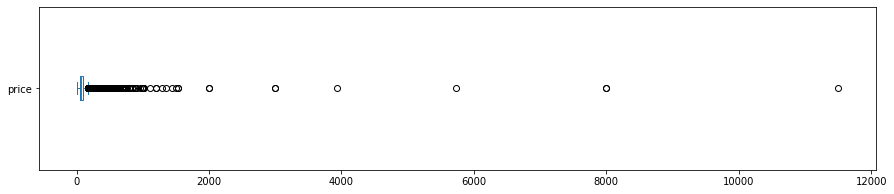


price: valores acima de 175
1076 entradas
7.4443%


In [ ]:
# price
df.price.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# ver quantidade de valores acima de 240 para price
print('\nprice: valores acima de 175')
print('{} entradas'.format(len(df[df.price > 175])))
print('{:.4f}%'.format((len(df[df.price > 175]) / df.shape[0])*100))

Alguns insights tirados dessa análise:

* Existem aproximadamente 1076 entradas de acomodações com valores acima de 175
* E essas acomodações representam apenas 7,44% do dataset

## Limpando o dataset
Após identificarmos outliers nas variáveis price e minimum_nights, vamos limpar o Dataset.

In [ ]:
# remover os *outliers* em um novo DataFrame
df_clean = df.copy()
df_clean.drop(df_clean[df.price > 175].index, axis=0, inplace=True)
df_clean.drop(df_clean[df.price == 0.0].index, axis=0, inplace=True)
df_clean.drop(df_clean[df.minimum_nights > 4.5].index, axis=0, inplace=True)

print('Shape antes da limpeza: ', df.shape)
print('Shape depois da limpeza: ', df_clean.shape)

Shape antes da limpeza:  (14454, 18)
Shape depois da limpeza:  (12151, 18)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


##Histogramas sem outliers
Com o Dataset limpo, irei plotar um histograma sem a presença dos outliers.

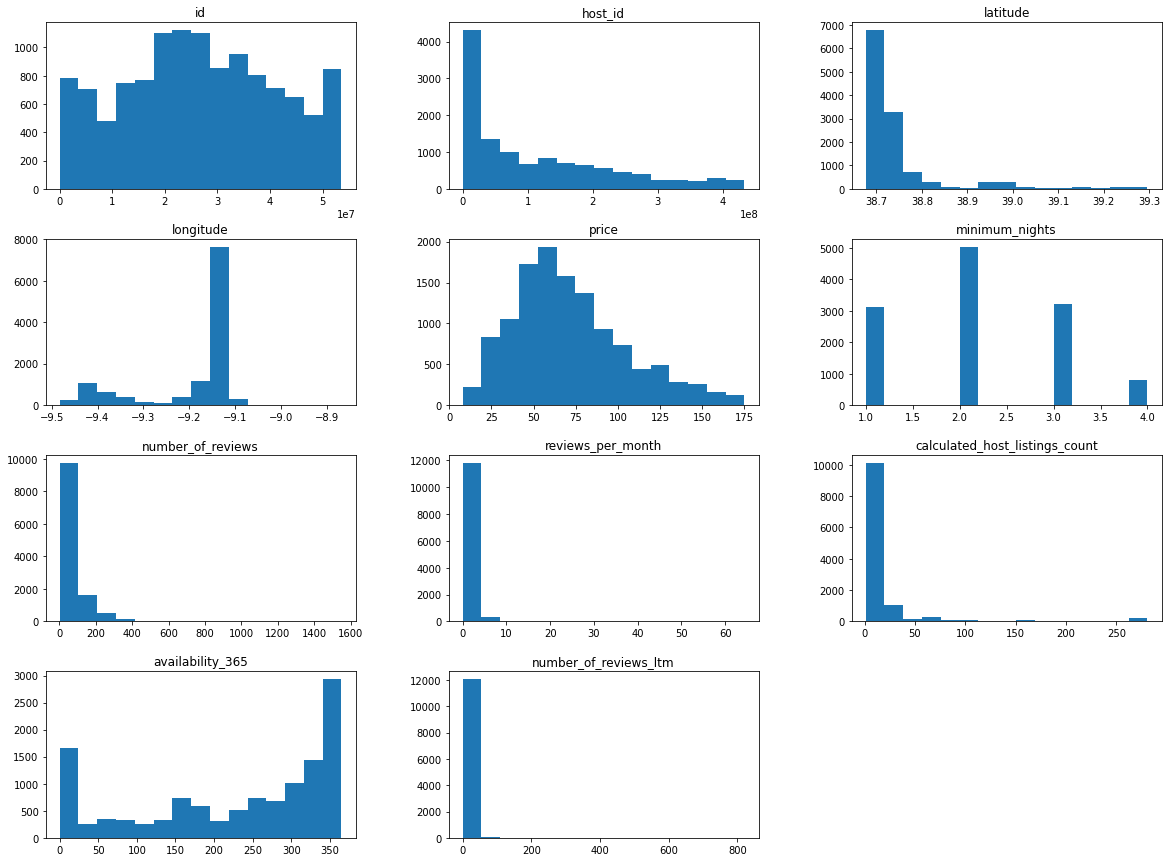

In [ ]:
# plotar o histograma para as variáveis numéricas
df_clean.hist(bins=15, figsize=(20,15), grid=False);

In [ ]:
# verificando a distribuição estatística dos dados limpos
df_clean.describe().round(1)

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,12151.0,12151.0,12151.0,12151.0,12151.0,12151.0,12151.0,12151.0,12151.0,12151.0,12151.0
mean,26684183.9,112376041.2,38.7,-9.2,71.5,2.1,60.6,1.4,16.9,225.9,8.8
std,14524464.8,115577429.4,0.1,0.1,33.2,0.9,81.1,1.4,43.2,125.9,14.6
min,25659.0,107347.0,38.7,-9.5,8.0,1.0,1.0,0.0,1.0,0.0,0.0
25%,15908328.5,15452873.0,38.7,-9.2,49.0,1.0,7.0,0.4,1.0,131.0,1.0
50%,26219370.0,69064898.0,38.7,-9.1,65.0,2.0,27.0,1.0,4.0,268.0,4.0
75%,37807199.5,186824778.0,38.7,-9.1,90.0,3.0,84.0,2.0,12.0,340.0,13.0
max,53567473.0,433801538.0,39.3,-8.9,175.0,4.0,1550.0,64.4,281.0,365.0,821.0


## Qual a média dos preços de aluguel?
Em uma análise onde temos o valor do aluguel, se torna interessante saber a média desse valor. De modo a tirar insights que auxiliam no cálculo do gasto com a acomodação, em uma possível viagem.

**Foi possível verificar que o valor médio do aluguel das acomodações é 71.53 euros**

In [ ]:
# ver a média da coluna `price`
df_clean['price'].mean()

71.53353633445806

Qual a correlação existente entre as variáveis?
Correlação significa que existe uma relação entre duas coisas. No contexto da análise, podemos buscar relação ou semelhança entre duas variáveis.

Essas relações podem ser medidas, e é função do coeficiente de relação estabelecer qual a intensidade dela. Para identificar as correlações existentes entre as variáveis de interesse, vou:

Criar uma matriz de correlação
Gerar um heatmap a partir dessa matriz, usando a biblioteca ``seaborn``.

In [ ]:
# criar uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']].corr()
# mostrar a matriz de correlação
display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,0.147661,-0.101052,-0.119445,0.131758,0.068399
minimum_nights,0.147661,1.000000,0.035628,-0.078550,-0.088391,-0.074740
number_of_reviews,-0.101052,0.035628,1.000000,0.690594,-0.118274,0.002071
reviews_per_month,-0.119445,-0.078550,0.690594,1.000000,-0.074813,0.047531
calculated_host_listings_count,0.131758,-0.088391,-0.118274,-0.074813,1.000000,0.090323
availability_365,0.068399,-0.074740,0.002071,0.047531,0.090323,1.000000


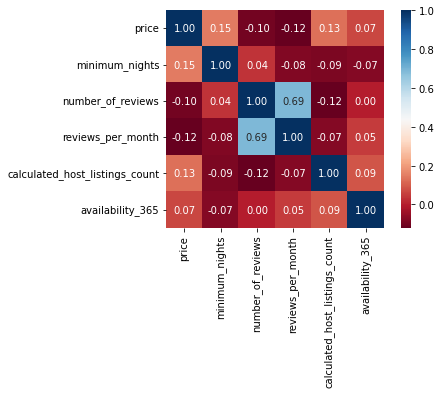

In [ ]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap='RdBu' , fmt='.2f', square=True, linecolor='white', annot=True);

##Qual o tipo de imóvel mais alugado no Airbnb?
A coluna ``room_typeindica`` qual categoria de imóvel está anunciado na plataforma. No site, existem opções de apartamentos/casas inteiras, aluguel de um quarto privado ou até mesmo dividir o mesmo quarto com outras pessoas.

Vamos contar a quantidade de ocorrências de cada tipo de aluguel, usando o método ``value_counts()``.

In [ ]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

Entire home/apt    9657
Private room       2177
Hotel room          169
Shared room         148
Name: room_type, dtype: int64

Os tipos de Imóveis que mais aparece são, em ordem:

* Quartos privados
* Casa/Apt inteiros
* Quartos compartilhados
* Quartos de Hotel

In [ ]:
# mostrar a porcentagem de cada tipo de imóvel disponível
(df_clean.room_type.value_counts() / df.shape[0])*100

Entire home/apt    66.811955
Private room       15.061575
Hotel room          1.169227
Shared room         1.023938
Name: room_type, dtype: float64

Os imóveis tem uma distribuição bem interessante, veja:

* Quartos privados e Casas/apts inteiros ocupam cerca de 81% dos imóveis anunciados
* E apenas 1% são Quartos compartilhados

Preço dos imóveis próximo a Lisboa?
É possível verificar uma variável em função de outra, usando groupby(). Neste caso, queremos comparar as cidades próximas (neighbourhoods) a partir do preço do aluguel. Espera-se que a maior concentração de preços mais elevados estajam em Lisboa e nas suas adjacências. 

É possível ver essa escala através da plotagem gráfica.

In [ ]:
# ver preços de cidades próximas, na média
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
Turcifal                   160.000000
Meca                       119.000000
Dois Portos e Runa         117.500000
Vilar                       97.166667
Ribamar                     95.000000
Igreja Nova e Cheleiros     91.916667
Parque das Naes             91.294118
Alcoentre                   90.000000
Sobral de Monte Agrao       90.000000
Bucelas                     86.333333
Name: price, dtype: float64

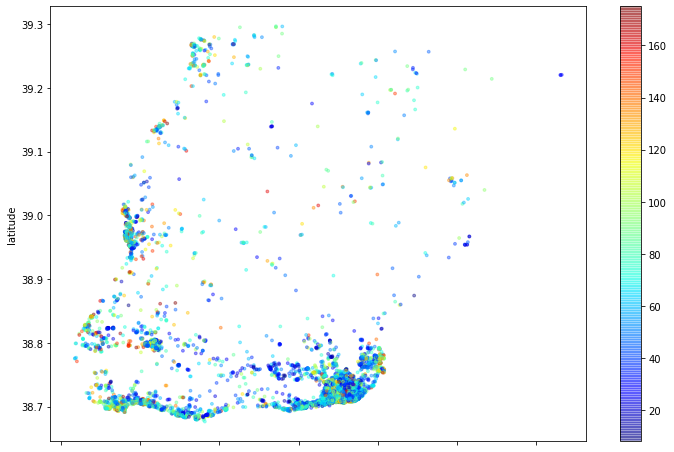

In [ ]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
        cmap=plt.get_cmap('jet'), figsize=(12,8));

##Qual é a média do mínimo de noites para aluguel (minimum_nights)?
Podemos ver que a média do mínimo de noites é 2 noites, isso nos mostra que os proprietários tendem a disponibilizar os imóveis por no mínimo 2 noites (fins de semana)

In [ ]:
# ver a média da coluna `minimum_nights`

df_clean['minimum_nights'].mean()

2.137766438976216

##Conclusões
Neste projeto, conseguimos tirar algumas informações sobre o Airbnb na cidade de Lisboa.

* Cerca de 66% dos anúncios são apenas de Entire home/apt, o que demonstra uma procura maior por privacidade dos hospedes.
* A média de preços é de 71.53 Euros, o que convertendo em reais na cotação atual e cerca de 365,36 R$ ou cerca de 30,14% do salário mínimo brasileiro.
* Cidades próximas a Lisboa tendem a ter o preço equiparado a ela.
* A média de minimum_nights é cerca de 2 noites, geralmente para que os hóspedes aluguem ao menos por um fim de semana (sábado e domingo).